In [2]:
import pandas as pd
import os

In [3]:
all_month_data = pd.DataFrame()

In [4]:
files = [file for file in os.listdir("./Sales_Data/")]
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data,df])

In [5]:
all_month_data.to_csv("all_month_data.csv", index=False)

In [6]:
# Augment data with additional columns
all_month_data["Month"] = all_month_data["Order Date"].str[0:2]

nan_df = all_month_data[all_month_data.isna().any(axis=1)]
nan_df

all_month_data = all_month_data.dropna(how='all')

all_month_data = all_month_data[all_month_data['Order Date'].str[0:2]!='Or']



all_month_data['Month'] = all_month_data['Month'].astype('int32')

all_month_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


In [7]:
# what was the best month for Sales? How much was earned that month?

In [8]:
all_month_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12


In [29]:
all_month_data["Quantity Ordered"]= pd.to_numeric(all_month_data["Quantity Ordered"])
all_month_data["Price Each"] = pd.to_numeric(all_month_data["Price Each"])

In [30]:
all_month_data['Sales'] = all_month_data["Quantity Ordered"] * all_month_data["Price Each"]

In [ ]:
# What was the best month for sales? How much was that month?

In [33]:
results = all_month_data.groupby(["Month"]).sum("Sales")

In [35]:
import matplotlib.pyplot as plt
months = range(1,13)

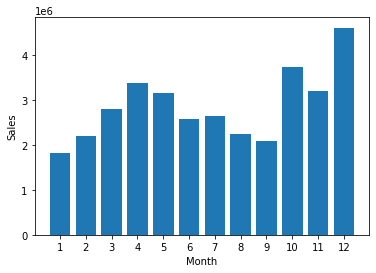

In [39]:
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

In [68]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

#### Which US city has the highest sale?

In [78]:
all_month_data['City'] = all_month_data["Purchase Address"].apply(lambda x: x.split(',')[1] + ' ' + get_state(x))

all_month_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.000000,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.000000,New York City NY
1,295666,LG Washing Machine,1,600.000000,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.000000,New York City NY
2,295667,USB-C Charging Cable,1,11.950000,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.950000,New York City NY
3,295668,27in FHD Monitor,1,149.990005,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.990005,San Francisco CA
4,295669,USB-C Charging Cable,1,11.950000,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.950000,Atlanta GA
...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.990000,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.990000,Boston MA
13618,222906,27in FHD Monitor,1,149.990005,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.990005,New York City NY
13619,222907,USB-C Charging Cable,1,11.950000,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.950000,San Francisco CA
13620,222908,USB-C Charging Cable,1,11.950000,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.950000,San Francisco CA


In [97]:
city_sales = all_month_data.groupby('City').sum()
cities = [city for city, df in all_month_data.groupby('City')]
cities

[' Atlanta GA',
 ' Austin TX',
 ' Boston MA',
 ' Dallas TX',
 ' Los Angeles CA',
 ' New York City NY',
 ' Portland ME',
 ' Portland OR',
 ' San Francisco CA',
 ' Seattle WA']

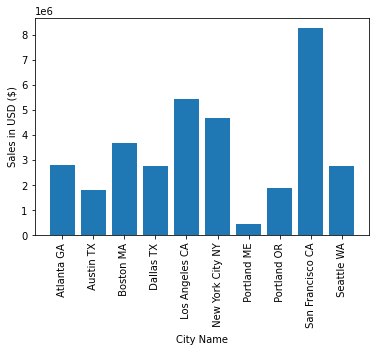

In [98]:
plt.bar(cities,city_sales['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel("City Name")
plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying products?

In [99]:
all_month_data['Order Date'] = pd.to_datetime(all_month_data['Order Date'])

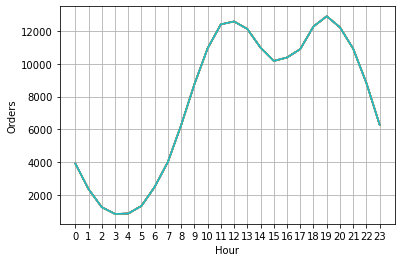

In [128]:
all_month_data['Hour'] = all_month_data['Order Date'].dt.hour
all_month_data['Minute'] = all_month_data['Order Date'].dt.minute
hour = [hour for hour,df in all_month_data.groupby('Hour')]

plt.plot(hour, all_month_data.groupby('Hour').count())
plt.xticks(hour)
plt.xlabel("Hour")
plt.ylabel("Orders")
plt.grid()
plt.show()

#### What Products are most ofter sold together ?

In [150]:
df = all_month_data[all_month_data["Order ID"].duplicated(keep=False)]

In [151]:
df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))

<ipython-input-151-9fdf5d30d333>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))


In [152]:
df = df[["Order ID" , "Grouped"]].drop_duplicates()

In [153]:
duplicate_data

<bound method DataFrame.drop_duplicates of       Order ID                                            Grouped
16      295681  Google Phone,USB-C Charging Cable,Bose SoundSp...
17      295681  Google Phone,USB-C Charging Cable,Bose SoundSp...
18      295681  Google Phone,USB-C Charging Cable,Bose SoundSp...
19      295681  Google Phone,USB-C Charging Cable,Bose SoundSp...
36      295698               Vareebadd Phone,USB-C Charging Cable
...        ...                                                ...
13592   222882     Apple Airpods Headphones,AA Batteries (4-pack)
13594   222884                  Google Phone,USB-C Charging Cable
13595   222884                  Google Phone,USB-C Charging Cable
13614   222903                    iPhone,Lightning Charging Cable
13615   222903                    iPhone,Lightning Charging Cable

[14649 rows x 2 columns]>

In [155]:
from itertools import combinations
from collections import Counter

In [161]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count

Counter({('Google Phone', 'USB-C Charging Cable'): 987,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Google Phone', 'Wired Headphones'): 414,
         ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77,
         ('USB-C Charging Cable', 'Wired Headphones'): 160,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
         ('AA Batteries (4-pack)', 'Bose SoundSport Headphones'): 28,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('iPhone', 'Apple Airpods Headphones'): 360,
         ('iPhone', 'Wired Headphones'): 447,
         ('Apple Airpods Headphones', 'Wired Headphones'): 69,
         ('34in Ultrawide Monitor', 'Lightning Charging Cable'): 18,
         ('USB-C Charging Cable', 'Apple Airpods Headphones'): 34,
         ('USB-C Charging Cable', '20in Monitor'): 10,
         ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 48,
         ('Apple Airpods Headpho

#### Which Product sold the most and why? 

In [165]:
product_chart = all_month_data.groupby("Product").sum()
product_chart

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,4.510690e+05,29336,4.541487e+05,58764,122252
27in 4K Gaming Monitor,6244,2.429638e+06,44440,2.435098e+06,90916,184331
27in FHD Monitor,7550,1.125975e+06,52558,1.132424e+06,107540,219948
34in Ultrawide Monitor,6199,2.348718e+06,43304,2.355558e+06,89076,183480
AA Batteries (4-pack),27635,7.901568e+04,145558,1.061184e+05,298342,609039
AAA Batteries (4-pack),31017,6.171659e+04,146370,9.274083e+04,297332,612113
Apple Airpods Headphones,15661,2.332350e+06,109477,2.349150e+06,223304,455570
Bose SoundSport Headphones,13457,1.332367e+06,94113,1.345565e+06,192445,392603
Flatscreen TV,4819,1.440000e+06,34224,1.445700e+06,68815,142789


In [170]:
product = [product for product, df in product_chart.groupby("Product")]
product

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

Text(0, 0.5, 'Quantity Ordered')

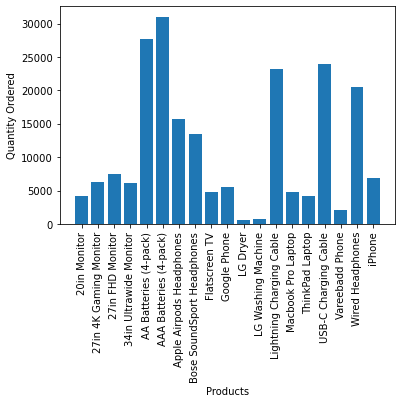

In [175]:
plt.bar(product,product_chart["Quantity Ordered"])
plt.xticks(product,rotation='vertical')

plt.xlabel("Products")
plt.ylabel("Quantity Ordered")

In [176]:
price = all_month_data.groupby('Product').mean()['Price Each']

<ipython-input-191-3d473b1583b1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical')


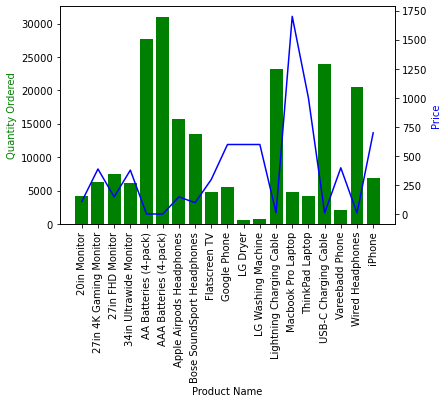

In [191]:
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product,product_chart["Quantity Ordered"], color='g')
ax2.plot(product,price,'b-')
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color = 'g')
ax2.set_ylabel("Price", color = "b")

ax1.set_xticklabels(product,rotation='vertical')
plt.show()